# Base Maps

This example reviews adding a basemap to a GeoDataFrame plot.

In [1]:
import geopandas as gpd
import mapped
import contextily as ctx
mapped.__version__, gpd.__version__, ctx.__version__

('20.04.01', '0.7.0', '1.0.0')

In [2]:
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))

Importing `mapped` monkeypatches `geopandas` to add several 
features to the `geopandas.GeoDataFrame.plot` method.

- It adds the keyword argument `basemap`, which adds a contextual 
  background map to plots.  Set to `True` to 
  get as default Positron style raster tiles from Carto.
- It attaches the coordinate reference system (`crs`) as an
  attribute onto the returned `Axes` object, which can then
  be automatically applied as a reprojection to any other 
  geographic data plotted on the same set of axes.

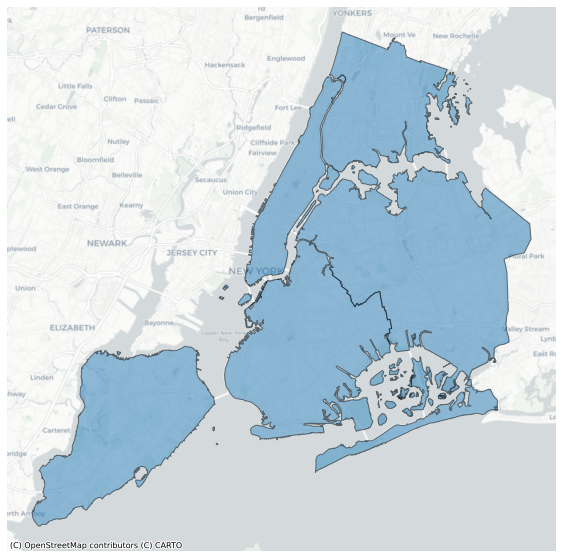

In [3]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

Or set to a string naming a style offered by `contextily` to get other map styles.
See a list of tile providers 
[here](https://github.com/geopandas/contextily/blob/master/contextily/_providers.py).

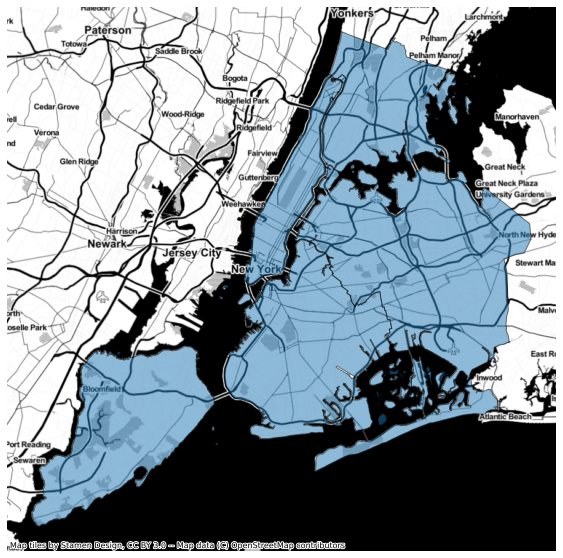

In [4]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.Toner');

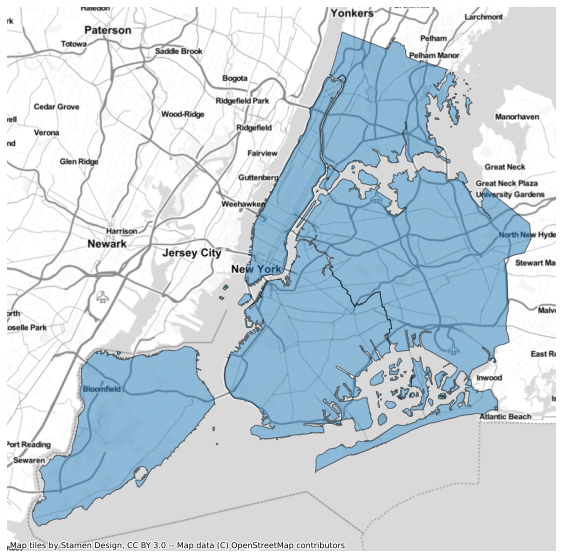

In [5]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.TonerLite');

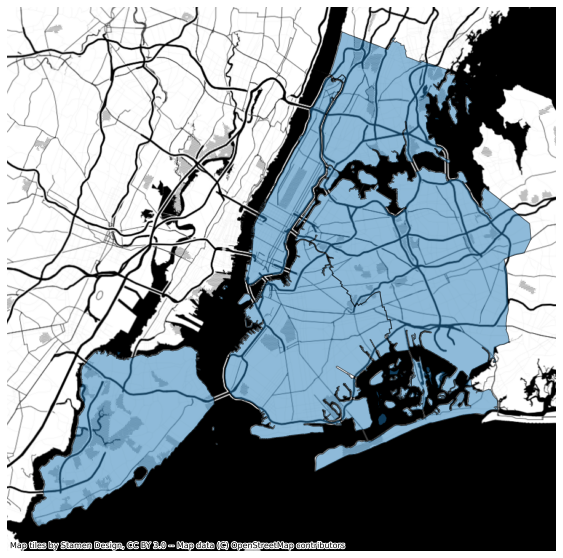

In [6]:
nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='Stamen.TonerBackground');

Note that a coordinate reference system (crs) must be defined on the 
GeoDataFrame if it is not already in Web Mercator (EPSG:3857).  Otherwise,
the map tiles will probably not align correctly and you will get unexpected
results.

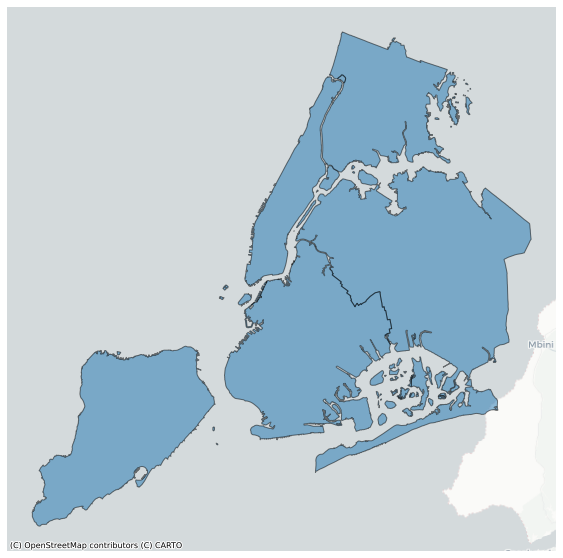

In [7]:
nybb2 = nybb.copy()
nybb2.crs = None
nybb2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

As noted above, when calling the `plot` method, the CRS is attached to the subplot axes 
as `crs`, and this is used to ensure that subsequent map objects drawn to
the same axes are rendered correctly, even if they use a different CRS.  Here we
demonstrate this by loading a shape from OpenStreetMap using the OSMnx package,
which delivers the shape with WGS84 coordinates. 

In [8]:
import osmnx as ox
newark = ox.gdf_from_place("Newark, NJ")

In [9]:
newark.crs

<Geographic 2D CRS: +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

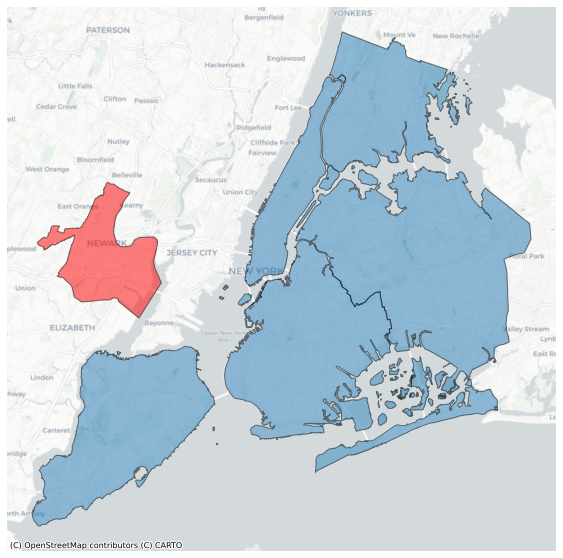

In [11]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True)
newark.plot(ax=ax, alpha=0.5, color='r', edgecolor='k');

Mapped also offers a seperate `add_basemap` method to attach a basemap
to an existing matplotlib `AxesSubplot`.

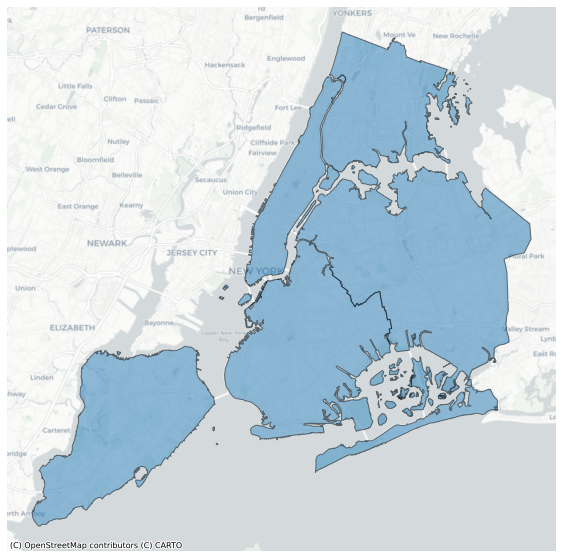

In [12]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
mapped.add_basemap(ax);

This is particularly useful when you want to add multiple sets of overlay
tiles, for example to add map labels floating above the objects you draw.

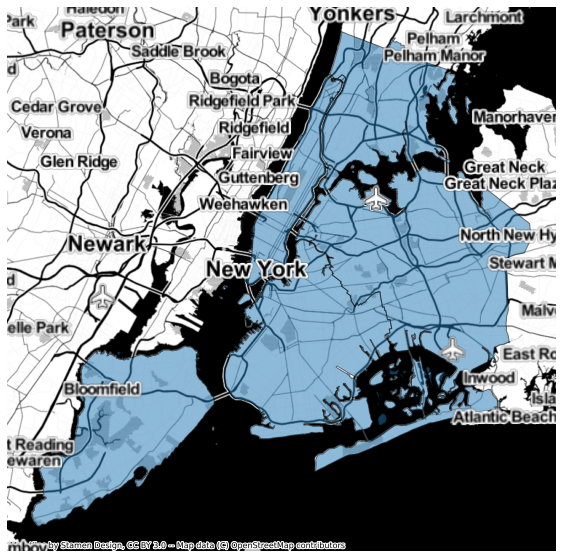

In [13]:
ax = nybb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
mapped.add_basemap(ax, tiles='Stamen.TonerBackground')
mapped.add_basemap(ax, tiles='Stamen.TonerLabels', zoom=10); # requires contextily PR #114